In [1]:
from IPython.display import Video

import jax.numpy as np
import pickle

import matplotlib.pyplot as plt

import experiment_utils as eutils

DATASET_ROOT = '/n/fs/mm-iga/Varmint/slurm_experiments/'

import sys
sys.argv = ['foo']  # eutils uses argparse, so this needs to be defined as a dummy for it to work.

In [ ]:
tanhexp = eutils.read_surrogate_experiment(DATASET_ROOT, 'newdataset', 'tanhsimple')
tanhbigexp = eutils.read_surrogate_experiment(DATASET_ROOT, 'newdataset', 'tanhsimplebigger')

plt.plot(tanhexp.iters, tanhexp.train_losses, label='Train Small')
plt.plot(tanhexp.iters, tanhexp.test_losses, label='Test Small')
plt.plot(tanhbigexp.iters, tanhbigexp.train_losses, label='Train Big')
plt.plot(tanhbigexp.iters, tanhbigexp.test_losses, label='Test Big')
plt.yscale('log')
plt.legend()

In [ ]:
df = eutils.gather_experiment_df('/n/fs/mm-iga/Varmint/slurm_experiments/smallsingleexampledataset/trained_surrogates/', r"^simplesteppersweep-[\d]+$", 'model.pkl')

In [ ]:
df['SUCCESS'].value_counts()

In [ ]:
df_success = df[df['SUCCESS']]

In [ ]:
df_success.loss_type.value_counts()

In [ ]:
params = zip(list(df_success['dsroot']), list(df_success['dsname']), list(df_success['exp_name']))

exps = []
for param in params:
    try:
        exp = eutils.read_surrogate_experiment(*param)
        exps.append(exp)
    except:
        print(f'Experiment {param[2]} could not be read.')

In [ ]:
cs = {
    'tanh': 'red',
    'selu': 'green',
    'relu': 'blue'
}

plt.figure(figsize=(16, 10))
for exp in exps:
    plt.plot(exp.iters, exp.train_losses, c=cs[exp.args['nn_activation']])
    print(exp.train_losses)
    plt.yscale('log')

plt.savefig('experimentfig.png')

In [2]:
df = eutils.gather_experiment_df('/n/fs/mm-iga/Varmint/slurm_experiments/smallsingleexampledataset/trained_surrogates/', r"^skipconnectwithmetrics-[\d]+$", 'model.pkl')
print(df['SUCCESS'].value_counts())
df_success = df[df['SUCCESS']]

True     72
False     9
Name: SUCCESS, dtype: int64


In [3]:
df_success

,exp_name,exp_root,seed,overwrite,dsroot,dsname,stepsize,batchsize,numiters,skip_weight,...,dsdir,exp_dir,ntrain,nfeat,nrad,ntest,SUCCESS,m_final_train_loss,m_final_test_loss,m_num_iters
0,skipconnectwithmetrics-0057,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016476819630659533,0.00016476819630659533,100000.0
1,skipconnectwithmetrics-0020,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,3,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016697446206597293,0.00016697446206597293,100000.0
4,skipconnectwithmetrics-0059,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,3,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016478637336545557,0.00016478637336545557,100000.0
6,skipconnectwithmetrics-0013,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,2,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016471482559869815,0.00016471482559869815,100000.0
7,skipconnectwithmetrics-0043,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,2,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016589660726091369,0.00016589660726091369,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,skipconnectwithmetrics-0056,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,3,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016493597682490512,0.00016493597682490512,100000.0
77,skipconnectwithmetrics-0058,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,2,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016472365402226807,0.00016472365402226807,100000.0
78,skipconnectwithmetrics-0023,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,3,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016440796879191606,0.00016440796879191606,100000.0
79,skipconnectwithmetrics-0052,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,2,False,/n/fs/mm-iga/Varmint/slurm_experiments/,smallsingleexampledataset,0.001,100,100000,0.01,...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,/n/fs/mm-iga/Varmint/slurm_experiments/smallsi...,1600,150,16,400,True,0.00016717421096628456,0.00016717421096628456,100000.0


In [7]:
print(df_success['m_final_train_loss'].min())
print(df_success['m_final_train_loss'].max())

0.00016440796879191606
0.00016957217467851362


In [8]:
0.00016577006834306507

0.00016577006834306507

In [9]:
params = zip(list(df_success['dsroot']), list(df_success['dsname']), list(df_success['exp_name']))

exps = []
for param in params:
    try:
        exp = eutils.read_surrogate_experiment(*param)
        exps.append(exp)
    except:
        print(f'Experiment {param[2]} could not be read.')

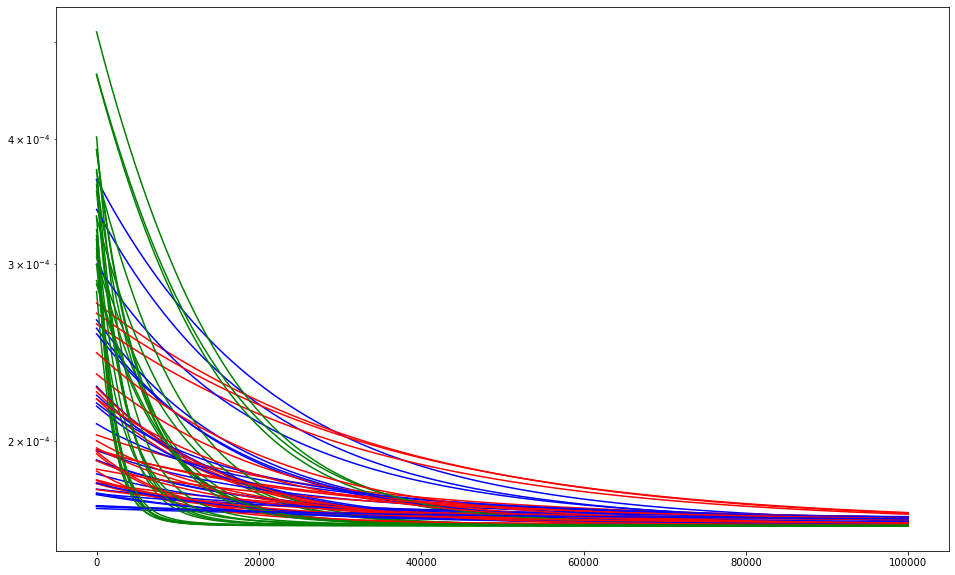

In [11]:
cs = {
    'tanh': 'red',
    'selu': 'green',
    'relu': 'blue'
}

plt.figure(figsize=(16, 10))
for exp in exps:
    iters = [s[0] for s in exp.train_losses]
    train_losses = [s[1] for s in exp.train_losses]
    plt.plot(iters, train_losses, c=cs[exp.args['nn_activation']])
    plt.yscale('log')

In [14]:
df = eutils.gather_experiment_df('/n/fs/mm-iga/Varmint/slurm_experiments/smallsingleexampledataset/trained_surrogates/', r"^skipconnectwithmetricsSGD-[\d]+$", 'model.pkl')
print(df['SUCCESS'].value_counts())
df_success = df[df['SUCCESS']]

True    81
Name: SUCCESS, dtype: int64


In [15]:
print(df_success['m_final_train_loss'].min())
print(df_success['m_final_train_loss'].max())

0.0001669803302687086
0.00029415011263258606
